<a href="https://colab.research.google.com/github/TaniaF2021/Predictive-analytics/blob/main/NLP_TANIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [7]:
rating_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/imdb_labelled.txt',sep='\t',names=['Message','Rating']);
rating_df

,Message,Rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [8]:
rating_df.head()

,Message,Rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
rating_df['Message'][1]

'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '

In [13]:
rating_df['Message'][4]

'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  '

In [14]:
len(rating_df['Message'][4])

108

In [15]:
max(rating_df['Message'].apply(len))

7944

In [29]:
msg_7944 = rating_df[rating_df['Message'].apply(len)==7944]
msg_7944

,Message,Rating
136,"In fact, it's hard to remember that the part ...",0


In [21]:
email_data_df.shape

(748, 2)

In [30]:
msg_7944.Message

136     In fact, it's hard to remember that the part ...
Name: Message, dtype: object

In [31]:
msg_7944.Message.iloc[0]

' In fact, it\'s hard to remember that the part of Ray Charles is being acted, and not played by the man himself.  \t1\nRay Charles is legendary.  \t1\nRay Charles\' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  \t1\nHitchcock is a great director.  \t1\nIronically I mostly find his films a total waste of time to watch.  \t0\nSecondly, Hitchcock pretty much perfected the thriller and chase movie.  \t1\nIt\'s this pandering to the audience that sabotages most of his films.  \t0\nHence the whole story lacks a certain energy.  \t0\nThe plot simply rumbles on like a machine, desperately depending on the addition of new scenes.  \t0\nThere are the usual Hitchcock logic flaws.  \t0\nMishima is extremely uninteresting.  \t0\nThis is a chilly, unremarkable movie about an author living/working in a chilly abstruse culture.  \t0\nThe flat reenactments don\'t hold your attention because they are emotionally adrift and

In [32]:
import string

In [33]:
remove_punct = [char for char in msg_7944.Message.iloc[0] if char not in string.punctuation]

In [35]:
remove_punct = ''.join(remove_punct)
remove_punct

' In fact its hard to remember that the part of Ray Charles is being acted and not played by the man himself  \t1\nRay Charles is legendary  \t1\nRay Charles life provided excellent biographical material for the film which goes well beyond being just another movie about a musician  \t1\nHitchcock is a great director  \t1\nIronically I mostly find his films a total waste of time to watch  \t0\nSecondly Hitchcock pretty much perfected the thriller and chase movie  \t1\nIts this pandering to the audience that sabotages most of his films  \t0\nHence the whole story lacks a certain energy  \t0\nThe plot simply rumbles on like a machine desperately depending on the addition of new scenes  \t0\nThere are the usual Hitchcock logic flaws  \t0\nMishima is extremely uninteresting  \t0\nThis is a chilly unremarkable movie about an author livingworking in a chilly abstruse culture  \t0\nThe flat reenactments dont hold your attention because they are emotionally adrift and stagy  \t0\nAnd the rest o

In [36]:
len(remove_punct)

7679

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords

In [39]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]

# remove_stopwords

In [41]:
len(remove_stopwords)

789

In [42]:
len(remove_punct)

7679

# Function
# To Automate the text data pre processing part

In [44]:
def rating_pre_process(rating_message):
  remove_punct = [char for char in rating_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [45]:
rating_df['Message'].head(10).apply(rating_pre_process)

0    [slowmoving, aimless, movie, distressed, drift...
1    [sure, lost, flat, characters, audience, nearl...
2    [Attempting, artiness, black, white, clever, c...
3                     [little, music, anything, speak]
4    [best, scene, movie, Gerardo, trying, find, so...
5    [rest, movie, lacks, art, charm, meaning, empt...
6                                 [Wasted, two, hours]
7    [Saw, movie, today, thought, good, effort, goo...
8                                   [bit, predictable]
9    [Loved, casting, Jimmy, Buffet, science, teacher]
Name: Message, dtype: object

In [46]:
rating_df.head()

,Message,Rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


# Vectorization

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
bag_of_words = CountVectorizer(analyzer=rating_pre_process).fit(rating_df['Message'])
bag_of_words_trf = bag_of_words.transform(rating_df['Message'])

# TF-IDF (Transformer)

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

# Model Building

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
GoodR_detector_model = MultinomialNB().fit(tfidf_trf,rating_df['Rating'])

In [67]:
test_message = rating_df['Message'][10]

In [68]:
bag_of_words_test_message = bag_of_words.transform([test_message])

In [69]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)

In [70]:
GoodR_detector_model.predict(tfidf_test_messsge)[0]

1

In [71]:
rating_df['Rating'][10]

1

In [65]:
rating_df.head()

,Message,Rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [72]:
prediction_for_all_ratings = GoodR_detector_model.predict(tfidf_trf)

In [73]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(rating_df['Rating'],prediction_for_all_ratings))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       362
           1       0.98      0.98      0.98       386

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748



# New Section

# Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
msg_train, msg_test, class_train, class_test = train_test_split(rating_df['Message'],rating_df['Rating']) 

In [79]:
print(msg_train.shape)
print(msg_test.shape)
print(class_train.shape)
print(class_test.shape)

(561,)
(187,)
(561,)
(187,)


# Pipeline Building

In [80]:
from sklearn.pipeline import Pipeline

In [82]:
text_pipeline = Pipeline([
                          ('bag_of_words',CountVectorizer(analyzer=rating_pre_process)),
                          ('tfidf',TfidfTransformer()),
                          ('classifier', MultinomialNB())
])

In [83]:
text_pipeline.fit(msg_train,class_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function rating_pre_process at 0x7f5ac6cbe5f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [84]:
text_pred = text_pipeline.predict(msg_test)

In [85]:
print(classification_report(text_pred,class_test))


              precision    recall  f1-score   support

           0       0.86      0.70      0.77        99
           1       0.72      0.88      0.79        88

    accuracy                           0.78       187
   macro avg       0.79      0.79      0.78       187
weighted avg       0.80      0.78      0.78       187



In [86]:
msg_test.iloc[0]

'I have to say that this film was excellently produced and tops the ratings as a typical sci fi film!  '

In [94]:
class_test.iloc[0]

1

In [88]:
text_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [95]:
class_test.iloc[1]

0

In [98]:
class_test


440    1
307    0
638    0
123    0
629    1
      ..
479    1
568    0
208    1
336    0
678    1
Name: Rating, Length: 187, dtype: int64

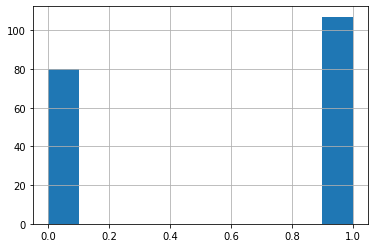

In [102]:
class_test.hist()


# Conclusion

- In the rating classification report the good ratings and the bad ratings were
equal. 0.98 
- as the test prediction the bad ratings (0) is more than the good ratings(1)